In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/plasma_processed.csv')
df.head

<bound method NDFrame.head of     Unnamed: 0  1_5-anhydroglucitol  1-monostearin  ...  xylitol  xylose    Class
0            1                 9483            103  ...      154    1380  disease
1            2                27468            207  ...      324     929  disease
2            3                13976             86  ...      253     610  disease
3            4                19449            178  ...      223     746  disease
4            5                17209            258  ...      189    2022  disease
..         ...                  ...            ...  ...      ...     ...      ...
77          78                25149            184  ...      252     856  control
78          79                24181            142  ...      359    1003  control
79          80                23848            118  ...      453    1279  control
80          81                13848             97  ...     1450    1045  control
81          82                19669            187  ...      225    

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Columns: 160 entries, Unnamed: 0 to Class
dtypes: int64(159), object(1)
memory usage: 102.6+ KB


In [3]:
df.isnull().sum()/len(df) * 100

Unnamed: 0                         0.0
1_5-anhydroglucitol                0.0
1-monostearin                      0.0
2_3-dihydroxybutanoic acid NIST    0.0
2_4-diaminobutyric acid            0.0
                                  ... 
uridine                            0.0
valine                             0.0
xylitol                            0.0
xylose                             0.0
Class                              0.0
Length: 160, dtype: float64

In [4]:
labels = np.reshape(df.Class.to_numpy(), (82,1))

# PCA

In [5]:
from sklearn.decomposition import PCA
def pca_analysis(n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [6]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [7]:
pca2 = pca_analysis(2)

pca2_df = make_dataframe(pca2, 2)
print(pca2_df.head)

<bound method NDFrame.head of         pc1      pc2    Class
0   27494.7 -4268.93  disease
1  -57539.2  4757.69  disease
2  -85672.8   104415  disease
3  -53732.4  22974.1  disease
4   48946.6  10084.1  disease
..      ...      ...      ...
77 -17470.6 -59355.6  control
78   146301  33375.9  control
79  75010.1 -77012.4  control
80   112923 -33203.6  control
81 -39521.3 -57006.7  control

[82 rows x 3 columns]>


<Figure size 432x288 with 0 Axes>

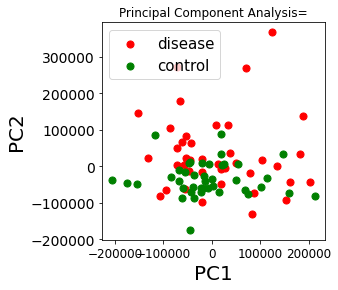

In [8]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(pca2_df.loc[indicesToKeep, 'pc1']
               , pca2_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [9]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)

In [10]:
pca3 = pca_analysis(3)

pca3_df = make_dataframe(pca3, 3)
# print(pca3_df.head)

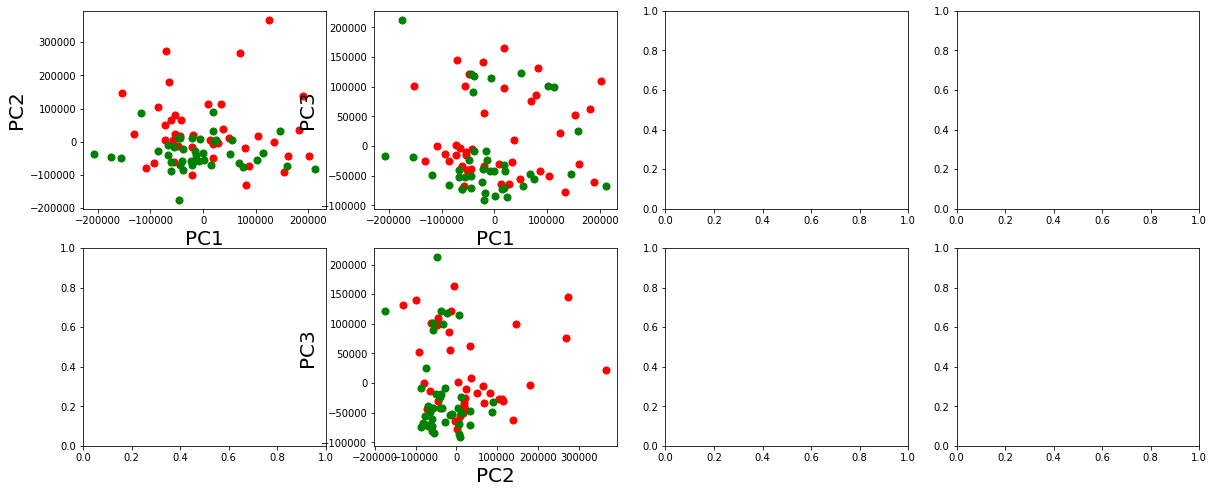

In [11]:
plotting(pca3_df, 3)

In [12]:
pca4 = pca_analysis(4)

pca4_df = make_dataframe(pca4, 4)
# print(pca4_df.head)

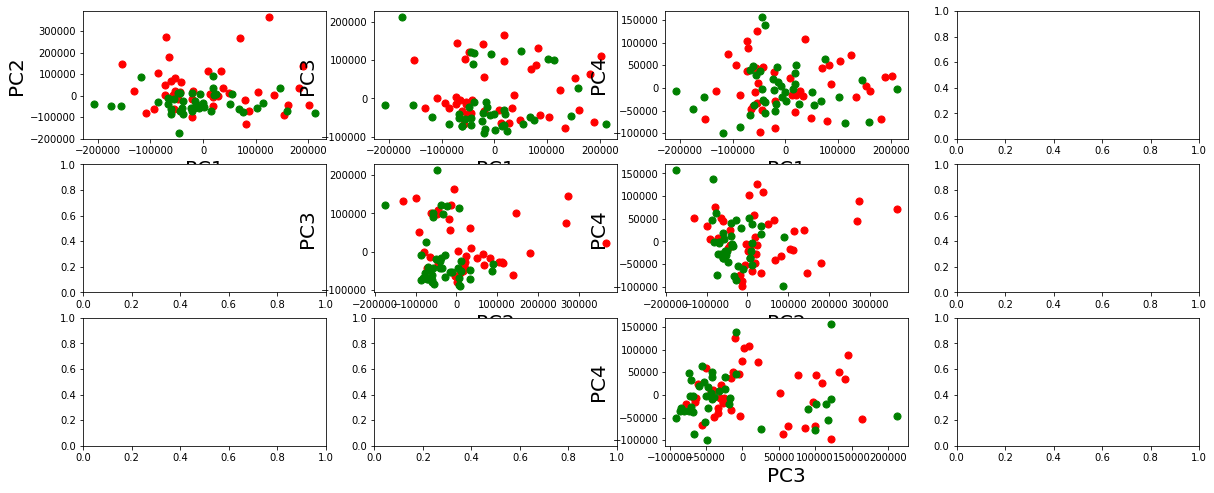

In [13]:
plotting(pca4_df, 4)

In [14]:
pca5 = pca_analysis(5)

pca5_df = make_dataframe(pca5, 5)
# print(pca5_df.head)

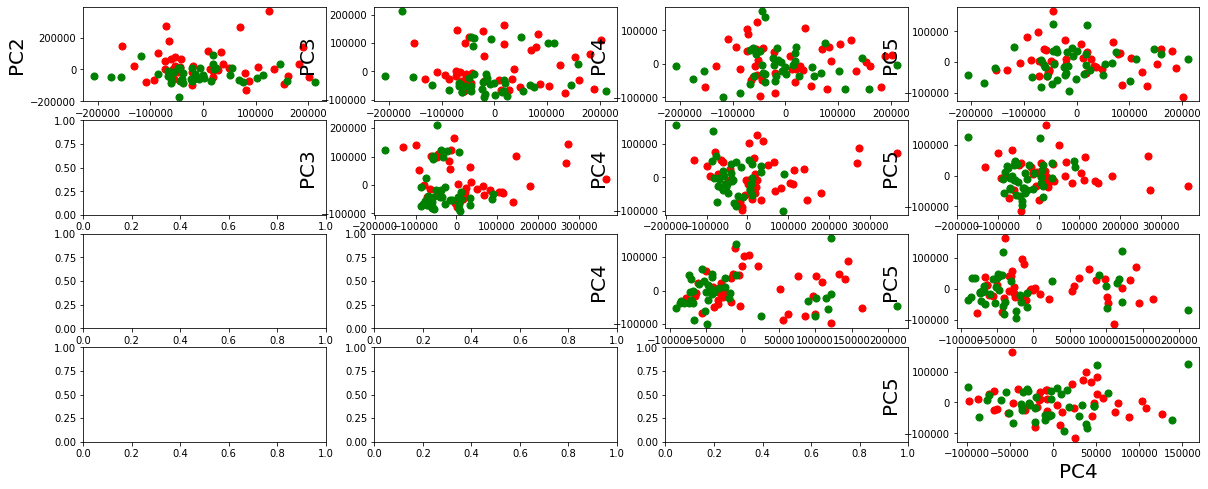

In [15]:
plotting(pca5_df, 5)

In [16]:
# now do PCA for 10, 15, 20
pca10 = pca_analysis(10)
pca10_df = make_dataframe(pca10, 10)

pca15 = pca_analysis(15)
pca15_df = make_dataframe(pca15, 15)

pca20 = pca_analysis(20)
pca20_df = make_dataframe(pca20, 20)
# print(pca20_df.head)

In [17]:
pca20_df.to_csv("pca20.csv")

#t-SNE

In [18]:
from sklearn.manifold import TSNE
def tsne_analysis(n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [19]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [20]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)

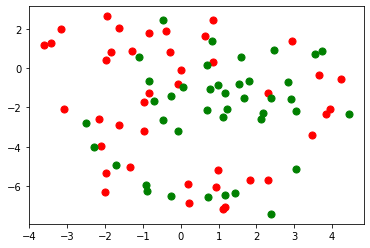

In [21]:
tsne2 = tsne_analysis(2)

tsne2_df = tsne_dataframe(tsne2, 2)
# print(tsne2_df.head)
# plotting(tsne2_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(tsne2_df.loc[indicesToKeep, 'tsne1']
               , tsne2_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

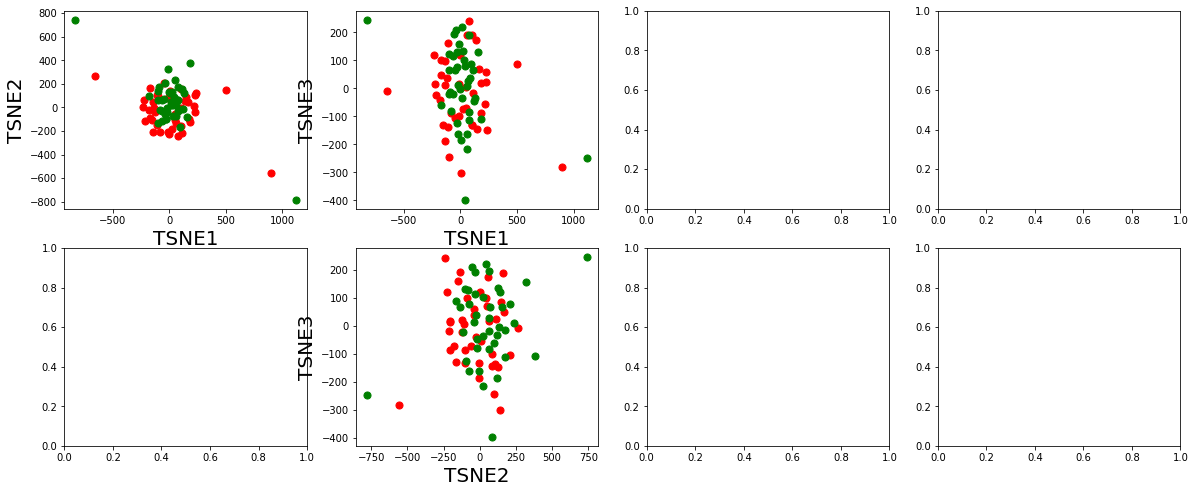

In [22]:
tsne3 = tsne_analysis(3)

tsne3_df = tsne_dataframe(tsne3, 3)
# print(tsne2_df.head)
tsne_plotting(tsne3_df, 3)


In [23]:
tsne3_df.to_csv('tsne3.csv')

# Models

In [24]:
# !pip install lazypredict

In [25]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()
y = y.map({"control": 1, "disease": 0})

X.shape, y.shape

((82, 159), (82,))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
models, predictions = clf.fit(X, X_test, y, y_test)
model_dictionary = clf.provide_models(X, X_test, y, y_test)

100%|██████████| 29/29 [00:01<00:00, 28.10it/s]


In [34]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,0.02
BaggingClassifier,1.00,1.00,1.00,1.00,1.00,0.04
XGBClassifier,1.00,1.00,1.00,1.00,1.00,0.09
SVC,1.00,1.00,1.00,1.00,1.00,0.02
SGDClassifier,1.00,1.00,1.00,1.00,1.00,0.02
RidgeClassifierCV,1.00,1.00,1.00,1.00,1.00,0.02
RidgeClassifier,1.00,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,0.19
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.00,0.02


In [35]:
predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,LabelPropagation,LabelSpreading,LinearDiscriminantAnalysis,LinearSVC,LogisticRegression,NearestCentroid,NuSVC,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
